In [1]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv('D:/Test/shampoo.csv', header=0, parse_dates=True, index_col='Month')

series.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_17912\90049500.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [2]:
series.dropna(axis=0, inplace=True)

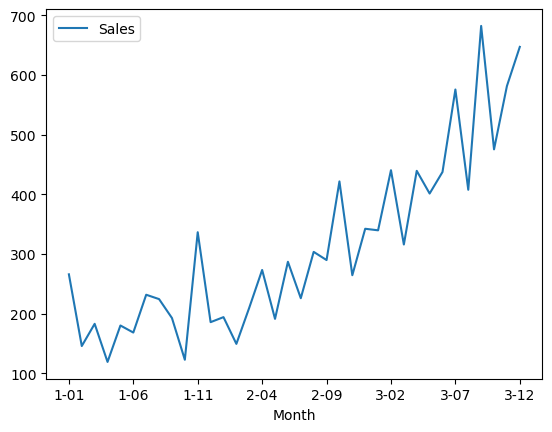

In [3]:
series.plot()
pyplot.show()

In [4]:
X = series.values
#X

In [5]:
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [6]:
train, test = X[0:size], X[size:len(X)]

In [7]:
import statsmodels.api as smapi
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = smapi.tsa.arima.ARIMA(history, order=(1,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=265.883859, expected=421.600000
predicted=302.978593, expected=264.500000
predicted=349.970807, expected=342.300000
predicted=286.003055, expected=339.700000
predicted=341.015454, expected=440.400000
predicted=341.819704, expected=315.900000
predicted=391.521274, expected=439.300000
predicted=339.753099, expected=401.300000
predicted=424.993908, expected=437.400000
predicted=387.268987, expected=575.500000
predicted=468.852028, expected=407.600000
predicted=503.761977, expected=682.000000
predicted=460.691662, expected=475.300000
predicted=613.988012, expected=581.300000
predicted=521.714870, expected=646.900000
Test MSE: 8889.928


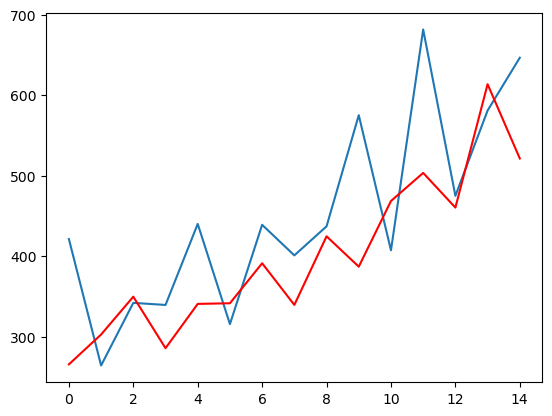

In [8]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()